# EDA 부분 추가
### 1. 주말과 주중 판매량 변화 눈으로 확인

#### weather.csv에 요일 변수와 휴일 변수 추가하기

In [1]:
keys = pd.read_csv('./data/key.csv', index_col = 0)
train = pd.read_csv('./data/train.csv', index_col = 0)
weather = pd.read_csv('./data/weather.csv', index_col = 0)

keys = keys.reset_index()
train = train.reset_index()
weather = weather.reset_index()

In [2]:
weather.head()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,1,2012-01-01,52,31,42,M,36,40,23,0,-,-,RA FZFG BR,M,0.05,29.78,29.92,3.6,20,4.6
1,2,2012-01-01,48,33,41,16,37,39,24,0,0716,1626,RA,0.0,0.07,28.82,29.91,9.1,23,11.3
2,3,2012-01-01,55,34,45,9,24,36,20,0,0735,1720,,0.0,0.00,29.77,30.47,9.9,31,10.0
3,4,2012-01-01,63,47,55,4,28,43,10,0,0728,1742,,0.0,0.00,29.79,30.48,8.0,35,8.2
4,6,2012-01-01,63,34,49,0,31,43,16,0,0727,1742,,0.0,0.00,29.95,30.47,14.0,36,13.8


In [3]:
def make_year(date):
    return int(date.split('-')[0])

def make_month(date):
    return int(date.split('-')[1])

def make_day(date):
    return int(date.split('-')[2])

def make_monthday(date):
    return (date.split('-')[1:3])

In [4]:
def is_leap_year(year):
    return ((year % 4 == 0 and year % 100 != 0) or year % 400 == 0)

def sum_of_days(year,monthday):
    
    month = int(monthday[0])
    day = int(monthday[1])
    
    common_year = [
        31,
        28 + + int(is_leap_year(year)),
        31,
        30,
        31,
        30,
        31,
        31,
        30,
        31,
        30,
        31
    ]
    tmp_days = 0
    for i in range(month - 1):
        tmp_days += common_year[i]
    tmp_days += day
    return tmp_days

In [5]:
# 요일 구하는 함수
def check_week_of_day(year,days):
    
    if year == 2012:

        date_list = ['Sun', 'Mon', 'Tue', 'Wed', 'Thi', 'Fri', 'Sat']
        
    elif year == 2013:
        
        date_list = ['Tue', 'Wed', 'Thi', 'Fri', 'Sat', 'Sun', 'Mon']
    else:
        
        date_list = ['Wed', 'Thi', 'Fri', 'Sat', 'Sun', 'Mon','Tue']
    
    return date_list[days % 7 - 1]

In [6]:
weather['year'] = weather['date'].apply(make_year)
weather['monthday'] = weather['date'].apply(make_monthday)
weather['days'] = weather.apply(lambda row : sum_of_days(row['year'], row['monthday']), axis = 1)
weather['dayofweek'] = weather.apply(lambda row : check_week_of_day(row['year'], row['days']), axis = 1)

In [7]:
def is_holiday(dayofweek):

    if dayofweek == "Sun" or dayofweek == "Sat":
        return 'holiday'
    else:
        return 'workday'

In [8]:
weather['holiday'] = weather['dayofweek'].apply(is_holiday)

In [9]:
del weather['year'], weather['monthday'], weather['days']
weather.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,dayofweek,holiday
20512,16,2014-10-31,53,34,44,M,35,41,21,0,...,,M,0.00,29.90,29.99,4.5,03,5.3,Fri,workday
20513,17,2014-10-31,59,34,47,M,32,41,18,0,...,RA,0.0,0.00,29.72,30.39,9.2,01,9.3,Fri,workday
20514,18,2014-10-31,67,49,58,-4,40,50,7,0,...,,0.0,0.00,29.78,30.28,10.6,36,11.2,Fri,workday
20515,19,2014-10-31,45,33,39,-6,24,32,26,0,...,RA SN,0.1,0.02,29.51,30.24,20.4,34,20.9,Fri,workday
20516,20,2014-10-31,68,50,59,M,39,50,6,0,...,,0.0,0.00,29.57,30.27,10.5,36,11.2,Fri,workday


In [10]:
weather.to_csv('./data/add_holiday_weather.csv', sep = ',')

In [11]:
tmp_data =  train.merge(keys).merge(weather)

tmp_data = tmp_data[tmp_data['units'] != 0]

tmp_data = tmp_data.loc[:,['date', 'station_nbr', 'store_nbr', 'item_nbr', 'units', 'dayofweek', 'holiday']]

In [12]:
tmp_data.to_csv('./data/check_for_holiday_and_units.csv', sep = ',')

### 2. 위에서 저장한 오로지 팔린 item_nbr에 대한 데이터 로드

- dayofweek : 요일 변수
- holiday : 휴일인지 아닌지 

In [13]:
data = pd.read_csv('data/check_for_holiday_and_units.csv', index_col = 0)

In [14]:
data.tail()

,date,station_nbr,store_nbr,item_nbr,units,dayofweek,holiday
4617332,2014-10-29,5,35,66,14,Wed,workday
4617393,2014-10-30,5,35,16,16,Thi,workday
4617443,2014-10-30,5,35,66,6,Thi,workday
4617504,2014-10-31,5,35,16,18,Fri,workday
4617554,2014-10-31,5,35,66,10,Fri,workday


#### pivot-table을 구성 
- index 는 store > 팔린 품목
- columns 는 holiday, workday
- values = 3년간 sales의 평균

In [15]:
pivot_data = data.pivot_table(values = 'units', index = ['store_nbr','item_nbr'], columns=['holiday']).fillna(value = 0).astype(int)

In [16]:
pivot_data.tail()

holiday             holiday  workday
store_nbr item_nbr                  
45        9              19       16
          22              1        1
          26              4        3
          34              2        1
          50              5        5

#### heatmap 까지 그려주도록 함수를 만들어서 눈으로 확인

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
def check_heatmap_holiday(nbr):
    store_nbr = pivot_data.loc[nbr]
    sns.heatmap(store_nbr, cmap="YlGnBu", annot = True, fmt = '.0f')

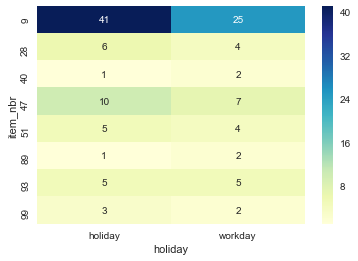

In [19]:
check_heatmap_holiday(1)

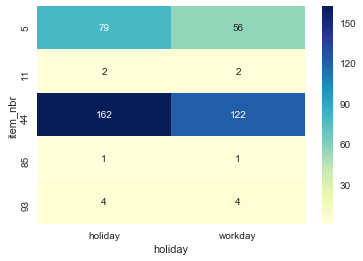

In [20]:
check_heatmap_holiday(2)

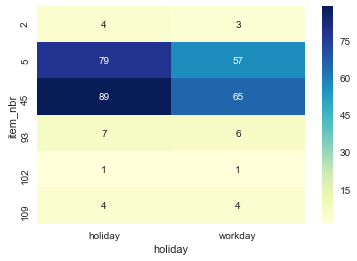

In [21]:
check_heatmap_holiday(3)

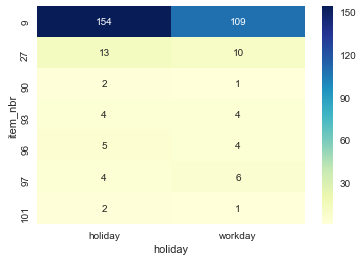

In [22]:
check_heatmap_holiday(4)

# Insight

#### 특정 인기품목에 대해서는 주중에 비해 휴일이 salesrk 높았던 것을 눈으로 확인할 수 있었습니다.
- 모델링할 때 휴일과 주중에 대한 컬럼변수도 고려할 수 있었다.

### 2. weather codesum에 대한 전처리

#### codesum 빈도
- 'BC': 111,
- 'BL': 59,
- 'BR': 6359,
- 'DU': 28,
- 'DZ': 497,
- 'FG': 1307,
- 'FU': 33,
- 'FZ': 332,
- 'GR': 3,
- 'GS': 5,
- 'HZ': 1482,
- 'MI': 52,
- 'MO': 11051,
- 'PL': 20,
- 'PR': 1,
- 'RA': 5325,
- 'SG': 1,
- 'SN': 1008,
- 'SQ': 14,
- 'TS': 1888,
- 'UP': 230,
- 'VC': 571

#### 전처리 방식:
- 예를 들어 `RA,FG,FZ,BR` 이라는 코드섬이 있다면 `5325, 1307, 332, 6359` 로 변환 후 가장 높은 수를 가진 2개의 코드섬으로 변환 즉 `BR,RA`로 변환

In [23]:
# Moderate한 곳은 MO 코드 임의로 추가
def fill_value_codesum(codesum):
    if codesum == " ":
        return "MO"
    else:
        return codesum

In [24]:
# handling이 쉽도록 깔금하게 정리하는 코드
def ch_codesum(codesum):
    result = ""
    
    codesum = codesum.replace(" ","")
    codesum = codesum.replace("+","")
    
    for s in range(0,len(codesum)):
        if s % 2 == 0 and s != 0:
            result += ',' + codesum[s]
        else:
            result += codesum[s]
    return result

In [25]:
weather = pd.read_csv('./data/weather.csv', index_col = 0)
weather = weather.reset_index()

# 코드섬 카테고리작업을 위한 copy
weather_v2 = weather.copy()
weather_v2 = weather_v2.loc[:,['date','codesum']]

# 함수적용
weather_v2['codesum'] = weather_v2['codesum'].apply(fill_value_codesum)
weather_v2['codesum'] = weather_v2['codesum'].apply(ch_codesum)

from collections import Counter
codesum_list = list(weather_v2['codesum'])
codesum_list[:10]

['RA,FZ,FG,BR',
 'RA',
 'MO',
 'MO',
 'MO',
 'MO',
 'RA,BR',
 'UP',
 'FG,FG,BR',
 'FG,FG,BR']

In [26]:
code_list = []
for i in codesum_list:
    i = list(set(i.split(',')))
    for j in i:
        code_list.append(j)
        
counts_code = dict(Counter(code_list))
counts_code

{'BC': 111,
 'BL': 59,
 'BR': 6359,
 'DU': 28,
 'DZ': 497,
 'FG': 1307,
 'FU': 33,
 'FZ': 332,
 'GR': 3,
 'GS': 5,
 'HZ': 1482,
 'MI': 52,
 'MO': 11051,
 'PL': 20,
 'PR': 1,
 'RA': 5325,
 'SG': 1,
 'SN': 1008,
 'SQ': 14,
 'TS': 1888,
 'UP': 230,
 'VC': 571}

In [27]:
# top2 select하는 함수
def codesum_two(codesum):
    codesum = codesum.split(',')
    if len(codesum) >= 2:
        tmp_code = []
        tmp_list = list(set([counts_code[code] for code in codesum]))
        tmp_list.sort()
        tmp_list.reverse()
        top2_code = tmp_list[:2]
        for idx,val in counts_code.items():
            if val in top2_code:
                tmp_code.append(idx)
            else:
                continue
        return ",".join(tmp_code)
    return ",".join(codesum)

In [28]:
weather_v2['codesum'] = weather_v2['codesum'].apply(codesum_two)

counts_codesum_set = dict(Counter(weather_v2['codesum']))

sum_percentage = 0
for idx,val in counts_codesum_set.items():
    
    if val > 1000:
        percentage = round((val / 20517) * 100,2)
        print(idx," "*(12 - len(idx)),val," "*(7 - len(str(val))),str(percentage)+"%")
        sum_percentage += percentage
            
print("-------total_percentage---------")
print(str(sum_percentage) + "%")

RA            1281     6.24%
MO            11051    53.86%
BR            1431     6.97%
RA,BR         3312     16.14%
-------total_percentage---------
83.21000000000001%


In [29]:
# Another code 남은 16%의 코드들은 AN으로 분류
def convert_codesum(codesum):
    if codesum == "BR" or codesum == "RA" or codesum == "BR,RA" or codesum == "MO":
        return codesum
    else:
        return "AN"

In [30]:
weather_v2['codesum'] = weather_v2['codesum'].apply(convert_codesum)
weather_v2['codesum'].unique()

array(['AN', 'RA', 'MO', 'BR'], dtype=object)

In [31]:
weather_v2.tail()

,date,codesum
20512,2014-10-31,MO
20513,2014-10-31,RA
20514,2014-10-31,MO
20515,2014-10-31,AN
20516,2014-10-31,MO


In [32]:
weather.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
20512,16,2014-10-31,53,34,44,M,35,41,21,0,-,-,,M,0.00,29.90,29.99,4.5,03,5.3
20513,17,2014-10-31,59,34,47,M,32,41,18,0,-,-,RA,0.0,0.00,29.72,30.39,9.2,01,9.3
20514,18,2014-10-31,67,49,58,-4,40,50,7,0,0644,1738,,0.0,0.00,29.78,30.28,10.6,36,11.2
20515,19,2014-10-31,45,33,39,-6,24,32,26,0,0624,1646,RA SN,0.1,0.02,29.51,30.24,20.4,34,20.9
20516,20,2014-10-31,68,50,59,M,39,50,6,0,-,-,,0.0,0.00,29.57,30.27,10.5,36,11.2


In [33]:
del weather['codesum']
weather['codesum'] = weather_v2['codesum']

In [34]:
weather['codesum'].unique()

array(['AN', 'RA', 'MO', 'BR'], dtype=object)

In [35]:
weather.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,codesum
20512,16,2014-10-31,53,34,44,M,35,41,21,0,-,-,M,0.00,29.90,29.99,4.5,03,5.3,MO
20513,17,2014-10-31,59,34,47,M,32,41,18,0,-,-,0.0,0.00,29.72,30.39,9.2,01,9.3,RA
20514,18,2014-10-31,67,49,58,-4,40,50,7,0,0644,1738,0.0,0.00,29.78,30.28,10.6,36,11.2,MO
20515,19,2014-10-31,45,33,39,-6,24,32,26,0,0624,1646,0.1,0.02,29.51,30.24,20.4,34,20.9,AN
20516,20,2014-10-31,68,50,59,M,39,50,6,0,-,-,0.0,0.00,29.57,30.27,10.5,36,11.2,MO


#### holiday 와 dayofweek 변수도 추가해서 넣어주자

In [36]:
holiday = pd.read_csv('./data/add_holiday_weather.csv', index_col = 0)
holiday.reset_index(drop = True).tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,dayofweek,holiday
20512,16,2014-10-31,53,34,44,M,35,41,21,0,...,,M,0.00,29.90,29.99,4.5,03,5.3,Fri,workday
20513,17,2014-10-31,59,34,47,M,32,41,18,0,...,RA,0.0,0.00,29.72,30.39,9.2,01,9.3,Fri,workday
20514,18,2014-10-31,67,49,58,-4,40,50,7,0,...,,0.0,0.00,29.78,30.28,10.6,36,11.2,Fri,workday
20515,19,2014-10-31,45,33,39,-6,24,32,26,0,...,RA SN,0.1,0.02,29.51,30.24,20.4,34,20.9,Fri,workday
20516,20,2014-10-31,68,50,59,M,39,50,6,0,...,,0.0,0.00,29.57,30.27,10.5,36,11.2,Fri,workday


In [37]:
holiday = holiday.loc[:,['dayofweek','holiday']]

In [38]:
weather = pd.concat([weather,holiday], axis = 1)

In [39]:
weather.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,codesum,dayofweek,holiday
20512,16,2014-10-31,53,34,44,M,35,41,21,0,...,M,0.00,29.90,29.99,4.5,03,5.3,MO,Fri,workday
20513,17,2014-10-31,59,34,47,M,32,41,18,0,...,0.0,0.00,29.72,30.39,9.2,01,9.3,RA,Fri,workday
20514,18,2014-10-31,67,49,58,-4,40,50,7,0,...,0.0,0.00,29.78,30.28,10.6,36,11.2,MO,Fri,workday
20515,19,2014-10-31,45,33,39,-6,24,32,26,0,...,0.1,0.02,29.51,30.24,20.4,34,20.9,AN,Fri,workday
20516,20,2014-10-31,68,50,59,M,39,50,6,0,...,0.0,0.00,29.57,30.27,10.5,36,11.2,MO,Fri,workday


In [40]:
print(weather['codesum'].unique())
print(weather['dayofweek'].unique())
print(weather['holiday'].unique())

['AN' 'RA' 'MO' 'BR']
['Sun' 'Mon' 'Tue' 'Wed' 'Thi' 'Fri' 'Sat']
['holiday' 'workday']


In [41]:
weather.to_csv('./data/weather_v2.csv', sep = ',')

# Modeling

## step1. 데이터 셋팅

In [42]:
from jw_package import *
from filling_missing import *
from functools import *

import configuration completed !
train + key + weather merging started
train + key + weather merging finished
function configuration completed ! 
Good to go !


In [43]:
each_station = []

for station_nbr in range(1,21):
    file_path = './data/weather_best_close_final/{:02}.csv'.format(station_nbr)
    station = pd.read_csv(file_path,index_col=0)
    station.dropna(axis=0,how='any',inplace=True)
    each_station.append(station)

weather = reduce((lambda x,y : x.append(y)),each_station)

sales = pd.read_csv('./data/train.csv')
keys = pd.read_csv('./data/key.csv')

data = sales.merge(keys).merge(weather)
data.tail()

,date,store_nbr,item_nbr,units,station_nbr,tmax,tmin,tavg,depart,dewpoint,...,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,codesum
4616485,2014-10-31,35,107,0,5,50.0,32.0,41.0,2.0,37.0,...,0.0,29.65,30.01,10.8,5.0,0.6,2014,10,31,
4616486,2014-10-31,35,108,0,5,50.0,32.0,41.0,2.0,37.0,...,0.0,29.65,30.01,10.8,5.0,0.6,2014,10,31,
4616487,2014-10-31,35,109,0,5,50.0,32.0,41.0,2.0,37.0,...,0.0,29.65,30.01,10.8,5.0,0.6,2014,10,31,
4616488,2014-10-31,35,110,0,5,50.0,32.0,41.0,2.0,37.0,...,0.0,29.65,30.01,10.8,5.0,0.6,2014,10,31,
4616489,2014-10-31,35,111,0,5,50.0,32.0,41.0,2.0,37.0,...,0.0,29.65,30.01,10.8,5.0,0.6,2014,10,31,


### step 1-1. train_data 으로 copy후 모델링
- 한번도 팔리지 않았던 것은 제외

In [44]:
train_data = data.copy()
train_data = train_data[train_data['units'] != 0]
train_data.reset_index(drop = True).tail()

,date,store_nbr,item_nbr,units,station_nbr,tmax,tmin,tavg,depart,dewpoint,...,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,codesum
118659,2014-10-29,35,66,14,5,64.0,40.0,52.0,6.0,55.0,...,0.02,29.21,29.87,8.2,23.0,6.7,2014,10,29,
118660,2014-10-30,35,16,16,5,64.0,40.0,52.0,6.0,38.0,...,0.02,29.21,29.95,8.3,30.0,6.7,2014,10,30,
118661,2014-10-30,35,66,6,5,64.0,40.0,52.0,6.0,38.0,...,0.02,29.21,29.95,8.3,30.0,6.7,2014,10,30,
118662,2014-10-31,35,16,18,5,50.0,32.0,41.0,2.0,37.0,...,0.00,29.65,30.01,10.8,5.0,0.6,2014,10,31,
118663,2014-10-31,35,66,10,5,50.0,32.0,41.0,2.0,37.0,...,0.00,29.65,30.01,10.8,5.0,0.6,2014,10,31,


In [45]:
del train_data['codesum']

In [46]:
holiday = pd.read_csv('./data/weather_v2.csv', index_col = 0)
holiday = holiday.merge(keys)
holiday = holiday.loc[:,['date','store_nbr','holiday','codesum', 'dayofweek']]
holiday.tail()

,date,store_nbr,holiday,codesum,dayofweek
46387,2014-10-27,35,workday,MO,Mon
46388,2014-10-28,35,workday,MO,Tue
46389,2014-10-29,35,workday,MO,Wed
46390,2014-10-30,35,workday,MO,Thi
46391,2014-10-31,35,workday,MO,Fri


In [47]:
train_data = train_data.merge(holiday, on = ['date','store_nbr'], how = 'inner')

In [48]:
train_data.tail()

,date,store_nbr,item_nbr,units,station_nbr,tmax,tmin,tavg,depart,dewpoint,...,sealevel,resultspeed,resultdir,avgspeed,year,month,day,holiday,codesum,dayofweek
118659,2014-10-29,35,66,14,5,64.0,40.0,52.0,6.0,55.0,...,29.87,8.2,23.0,6.7,2014,10,29,workday,MO,Wed
118660,2014-10-30,35,16,16,5,64.0,40.0,52.0,6.0,38.0,...,29.95,8.3,30.0,6.7,2014,10,30,workday,MO,Thi
118661,2014-10-30,35,66,6,5,64.0,40.0,52.0,6.0,38.0,...,29.95,8.3,30.0,6.7,2014,10,30,workday,MO,Thi
118662,2014-10-31,35,16,18,5,50.0,32.0,41.0,2.0,37.0,...,30.01,10.8,5.0,0.6,2014,10,31,workday,MO,Fri
118663,2014-10-31,35,66,10,5,50.0,32.0,41.0,2.0,37.0,...,30.01,10.8,5.0,0.6,2014,10,31,workday,MO,Fri


### step 1-2. train_data로 모델링
- statsmodels

In [49]:
formula = ('np.log(units) ~ C(store_nbr) + C(item_nbr) + C(day) + C(dayofweek) + C(codesum)')
model = sm.OLS.from_formula(formula, data= train_data)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(units)   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     3658.
Date:                Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                        19:33:17   Log-Likelihood:            -1.0602e+05
No. Observations:              118664   AIC:                         2.124e+05
Df Residuals:                  118470   BIC:                         2.143e+05
Df Model:                         193                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.8520    

#### BR, RA 코드는 p-value 높게 나옴
- RA로 변경

In [50]:
def convert_codesum2(codesum):
    if codesum == "BR,RA":
        return "RA"
    else:
        return codesum

In [51]:
train_data['codesum'] = train_data['codesum'].apply(convert_codesum2)

In [52]:
formula = ('np.log(units) ~ C(store_nbr) + C(item_nbr) + C(day) + C(dayofweek) + C(codesum)')
model = sm.OLS.from_formula(formula, data= train_data)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(units)   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     3658.
Date:                Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                        19:33:23   Log-Likelihood:            -1.0602e+05
No. Observations:              118664   AIC:                         2.124e+05
Df Residuals:                  118470   BIC:                         2.143e+05
Df Model:                         193                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.8520    

### step 1-3. 생성된 모델 아웃라이어 제거

In [53]:
res = result.resid_pearson
index = result.resid.index
outlier_index = abs(res) >= 2

row = pd.Series(index=index, data=res)
drop_index = row[outlier_index].index
len(drop_index)

train_data.drop(list(drop_index),inplace=True)
train_data.reset_index(drop = True, inplace = True)
len(train_data)

112805

In [54]:
formula = ('np.log(units) ~ C(store_nbr) + C(item_nbr) + C(day) + C(dayofweek) + C(codesum)')
model = sm.OLS.from_formula(formula, data= train_data)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(units)   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     5782.
Date:                Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                        19:33:28   Log-Likelihood:                -74565.
No. Observations:              112805   AIC:                         1.495e+05
Df Residuals:                  112611   BIC:                         1.514e+05
Df Model:                         193                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.8013    

### step 1~4. 1차적으로 아웃라이어를 제거한 모델을 교차검증하기 위해 scikit-learn 패키지를 통해 동일하게 모델을 생성한다

In [55]:
from patsy import dmatrices
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

#### LinearRegression, Ridge, Lasso, Elastic Net 각각의 모델을 생성

In [56]:
# 먼저 문자열을 정수혀으로 변환
def convert_dayofweek(dow):
    if dow == "Mon":
        return 1
    if dow == "Tue":
        return 2
    if dow == "Wed":
        return 3
    if dow == "Thi":
        return 4
    if dow == "Fri":
        return 5
    if dow == "Sat":
        return 6
    if dow == "Sun":
        return 7
    
def convert_holiday(holiday):
    if holiday == "holiday":
        return 0
    if holiday == "workday":
        return 1

def convert_codesum(codesum):
    if codesum == "AN":
        return 0
    if codesum == "MO":
        return 1
    if codesum == "RA":
        return 2
    if codesum == "BR":
        return 3
    
train_data['dayofweek'] = train_data['dayofweek'].apply(convert_dayofweek)
train_data['holiday'] = train_data['holiday'].apply(convert_holiday)
train_data['codesum'] = train_data['codesum'].apply(convert_codesum)

In [57]:
y, X = dmatrices('np.log(units) ~ C(store_nbr) + C(item_nbr) + C(day) +C(dayofweek) +C(codesum)', train_data, return_type = 'dataframe')

model_LR = LinearRegression().fit(X, y)
model_ridge = Ridge(alpha = 0.01).fit(X, y)
model_lasso = Lasso(alpha = 0.01).fit(X, y)
model_EN = ElasticNet(alpha = 0.01).fit(X, y)

/Users/kimdh/.pyenv/versions/3.5.0/envs/mv_env350/lib/python3.5/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


#### 교차검증

In [58]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

cv = KFold(10, shuffle=True)
#cross_val_score(model1_LR, X, y, scoring="r2", cv=cv)
print('[Original LR]')
print('score : ', cross_val_score(model_LR, X, y, scoring="r2", cv=cv),'\n',
      'mean : ', np.mean(cross_val_score(model_LR, X, y, scoring="r2", cv=cv)),'\n')

print('[Ridge]')
print('score : ', cross_val_score(model_ridge, X, y, scoring="r2", cv=cv),'\n',
      'mean : ', np.mean(cross_val_score(model_ridge, X, y, scoring="r2", cv=cv)),'\n')
      #'std : ', np.std(cross_val_score(model1_ridge, X, y, scoring="r2", cv=cv)))

print('\n[Lasso]')
print('score : ', cross_val_score(model_lasso, X, y, scoring="r2", cv=cv),'\n',
      'mean : ', np.mean(cross_val_score(model_lasso, X, y, scoring="r2", cv=cv)),'\n')
      #'std : ', np.std(cross_val_score(model1_lasso, X, y, scoring="r2", cv=cv)))

print('\n[Elastic-net]')
print('score : ', cross_val_score(model_EN, X, y, scoring="r2", cv=cv),'\n',
      'mean : ', np.mean(cross_val_score(model_EN, X, y, scoring="r2", cv=cv)),'\n')
#      'std : ', np.std(cross_val_score(model1_EN, X, y, scoring="r2", cv=cv)))

[Original LR]
score :  [ 0.90853474  0.90704424  0.90782653  0.90929051  0.90783228  0.90882168
  0.90687113  0.90728884  0.90699181  0.90900976] 
 mean :  0.907935356177 

[Ridge]
score :  [ 0.9088438   0.90610654  0.90993696  0.91023631  0.90926449  0.90706866
  0.9048929   0.90777142  0.90816097  0.90700423] 
 mean :  0.907938378272 


[Lasso]
score :  [ 0.71752803  0.71957797  0.71782177  0.71878783  0.71705892  0.71931943
  0.72127342  0.72292656  0.7188873   0.72000712] 
 mean :  0.71931400353 


[Elastic-net]
score :  [ 0.73647437  0.73081625  0.73513318  0.73539498  0.72993869  0.72672042
  0.7267567   0.73196018  0.73041233  0.73665689] 
 mean :  0.732052774457 



### step 1-5. model_ridge 선택

## step 2. test 데이터로 모델 적용

### step 2-1. test파일 로드 후 전처리한 codesum과 dayofweek, holiday 변수 추가

In [59]:
test = pd.read_csv('./data/test.csv', index_col = 0)
test.reset_index(inplace = True)
test.tail()

,date,store_nbr,item_nbr
526912,2014-10-26,45,107
526913,2014-10-26,45,108
526914,2014-10-26,45,109
526915,2014-10-26,45,110
526916,2014-10-26,45,111


In [60]:
test_X = test.merge(keys).merge(weather)
test_X.tail()

,date,store_nbr,item_nbr,station_nbr,tmax,tmin,tavg,depart,dewpoint,wetbulb,...,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,codesum
526912,2014-08-02,40,107,13,81.0,51.0,66.0,3.0,47.0,56.0,...,0.0,24.44,30.12,5.7,17.0,6.5,2014,8,2,
526913,2014-08-02,40,108,13,81.0,51.0,66.0,3.0,47.0,56.0,...,0.0,24.44,30.12,5.7,17.0,6.5,2014,8,2,
526914,2014-08-02,40,109,13,81.0,51.0,66.0,3.0,47.0,56.0,...,0.0,24.44,30.12,5.7,17.0,6.5,2014,8,2,
526915,2014-08-02,40,110,13,81.0,51.0,66.0,3.0,47.0,56.0,...,0.0,24.44,30.12,5.7,17.0,6.5,2014,8,2,
526916,2014-08-02,40,111,13,81.0,51.0,66.0,3.0,47.0,56.0,...,0.0,24.44,30.12,5.7,17.0,6.5,2014,8,2,


In [61]:
del test_X['codesum']
test_X = test_X.merge(holiday, on = ['date','store_nbr'])

In [62]:
test_X.tail()

,date,store_nbr,item_nbr,station_nbr,tmax,tmin,tavg,depart,dewpoint,wetbulb,...,sealevel,resultspeed,resultdir,avgspeed,year,month,day,holiday,codesum,dayofweek
526912,2014-08-02,40,107,13,81.0,51.0,66.0,3.0,47.0,56.0,...,30.12,5.7,17.0,6.5,2014,8,2,holiday,MO,Sat
526913,2014-08-02,40,108,13,81.0,51.0,66.0,3.0,47.0,56.0,...,30.12,5.7,17.0,6.5,2014,8,2,holiday,MO,Sat
526914,2014-08-02,40,109,13,81.0,51.0,66.0,3.0,47.0,56.0,...,30.12,5.7,17.0,6.5,2014,8,2,holiday,MO,Sat
526915,2014-08-02,40,110,13,81.0,51.0,66.0,3.0,47.0,56.0,...,30.12,5.7,17.0,6.5,2014,8,2,holiday,MO,Sat
526916,2014-08-02,40,111,13,81.0,51.0,66.0,3.0,47.0,56.0,...,30.12,5.7,17.0,6.5,2014,8,2,holiday,MO,Sat


### step 2-2. test_X 중 모델에 적용시킬 데이터만 뽑기. ( 팔린 unit에 대해서만 적용 )

In [63]:
test_X_model = pd.DataFrame(columns=['date','store_nbr', 'item_nbr','day','dayofweek','codesum'])

for nbr in range(1, 45+1):
    store_nbr = train_data[train_data['store_nbr'].isin([nbr])]
    sold_item_list = list(store_nbr['item_nbr'].unique())
    sold_item_list

    test_store_nbr = test_X[test_X['store_nbr'].isin([nbr])]
    to_test_df = test_store_nbr[test_store_nbr['item_nbr'].isin(sold_item_list)]

    test_X_model = pd.concat([test_X_model, to_test_df], axis = 0)
    
test_X_model.shape

(26168, 27)

In [64]:
test_X_model.head()

,avgspeed,codesum,cool,date,day,dayofweek,depart,dewpoint,heat,holiday,...,station_nbr,stnpressure,store_nbr,sunrise,sunset,tavg,tmax,tmin,wetbulb,year
484301,8.0,MO,0.0,2013-06-04,4,Tue,9.0,42.0,3.0,workday,...,1.0,29.77,1,385.0,1087.0,62.0,70.0,53.0,52.0,2013.0
484320,8.0,MO,0.0,2013-06-04,4,Tue,9.0,42.0,3.0,workday,...,1.0,29.77,1,385.0,1087.0,62.0,70.0,53.0,52.0,2013.0
484332,8.0,MO,0.0,2013-06-04,4,Tue,9.0,42.0,3.0,workday,...,1.0,29.77,1,385.0,1087.0,62.0,70.0,53.0,52.0,2013.0
484339,8.0,MO,0.0,2013-06-04,4,Tue,9.0,42.0,3.0,workday,...,1.0,29.77,1,385.0,1087.0,62.0,70.0,53.0,52.0,2013.0
484343,8.0,MO,0.0,2013-06-04,4,Tue,9.0,42.0,3.0,workday,...,1.0,29.77,1,385.0,1087.0,62.0,70.0,53.0,52.0,2013.0


In [65]:
test_X_model['dayofweek'] = test_X_model['dayofweek'].apply(convert_dayofweek)
test_X_model['holiday'] = test_X_model['holiday'].apply(convert_holiday)
test_X_model['codesum'] = test_X_model['codesum'].apply(convert_codesum)

In [66]:
from patsy import dmatrix
t_X = dmatrix('C(store_nbr) + C(item_nbr) +C(day) +C(dayofweek) +C(codesum)', test_X_model, return_type = 'dataframe')

In [67]:
y_hat = model_ridge.predict(t_X)

ValueError: shapes (26168,190) and (194,1) not aligned: 190 (dim 1) != 194 (dim 0)

### step 2-3. shape이 맞지 않다. 확인

- 35번 store에 대한 정보가 없다. (test 데이터에는!!)

In [68]:
len(test_X_model['store_nbr'].unique()),len(train_data['store_nbr'].unique())

(44, 45)

In [69]:
set(train_data['store_nbr'].unique()) - set(test_X_model['store_nbr'].unique())

{35}

- item_nbr 24, 63, 66에 대해선 test 데이터에는 없다!
- 모델 생성 부분에서 train_data에서 store_nbr = 35인 데이터는 제외하고 돌리면 해결될 듯하다

In [70]:
len(test_X_model['item_nbr'].unique()),len(train_data['item_nbr'].unique())

(108, 111)

In [71]:
set(train_data['item_nbr'].unique()) - set(test_X_model['item_nbr'].unique())

{24, 63, 66}

- 나머지는 정상

In [72]:
print(len(test_X_model['day'].unique()),len(train_data['day'].unique()))
print(len(test_X_model['codesum'].unique()),len(train_data['codesum'].unique()))
print(len(test_X_model['dayofweek'].unique()),len(train_data['dayofweek'].unique()))

31 31
4 4
7 7


#### train_data 리셋

In [73]:
train_data = data.copy()
train_data = train_data[train_data['units'] != 0]
train_data.reset_index(drop = True).tail()

del train_data['codesum']
train_data = train_data.merge(holiday, on = ['date','store_nbr'], how = 'inner')

train_data['codesum'] = train_data['codesum'].apply(convert_codesum2)
train_data['dayofweek'] = train_data['dayofweek'].apply(convert_dayofweek)
train_data['holiday'] = train_data['holiday'].apply(convert_holiday)
train_data['codesum'] = train_data['codesum'].apply(convert_codesum)
train_data.tail()

,date,store_nbr,item_nbr,units,station_nbr,tmax,tmin,tavg,depart,dewpoint,...,sealevel,resultspeed,resultdir,avgspeed,year,month,day,holiday,codesum,dayofweek
118659,2014-10-29,35,66,14,5,64.0,40.0,52.0,6.0,55.0,...,29.87,8.2,23.0,6.7,2014,10,29,1,1,3
118660,2014-10-30,35,16,16,5,64.0,40.0,52.0,6.0,38.0,...,29.95,8.3,30.0,6.7,2014,10,30,1,1,4
118661,2014-10-30,35,66,6,5,64.0,40.0,52.0,6.0,38.0,...,29.95,8.3,30.0,6.7,2014,10,30,1,1,4
118662,2014-10-31,35,16,18,5,50.0,32.0,41.0,2.0,37.0,...,30.01,10.8,5.0,0.6,2014,10,31,1,1,5
118663,2014-10-31,35,66,10,5,50.0,32.0,41.0,2.0,37.0,...,30.01,10.8,5.0,0.6,2014,10,31,1,1,5


#### store_nbr = 35 인 데이터 제거

In [74]:
drop_list = list(train_data[train_data['store_nbr'].isin([35])].index)
train_data.drop(index = drop_list,axis = 0,inplace = True)

In [75]:
len(train_data)

116071

### step 1-2 ~ 1-4  반복

In [76]:
formula = ('np.log(units) ~ C(store_nbr) + C(item_nbr) + C(day) + C(dayofweek) +C(codesum)')
model = sm.OLS.from_formula(formula, data= train_data)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(units)   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     3715.
Date:                Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                        19:35:25   Log-Likelihood:            -1.0352e+05
No. Observations:              116071   AIC:                         2.074e+05
Df Residuals:                  115881   BIC:                         2.093e+05
Df Model:                         189                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.9225      0

In [77]:
res = result.resid_pearson
index = result.resid.index
outlier_index = abs(res) >= 2

row = pd.Series(index=index, data=res)
drop_index = row[outlier_index].index
len(drop_index)

train_data.drop(list(drop_index),inplace=True)
train_data.reset_index(drop = True, inplace = True)

In [78]:
y, X = dmatrices('np.log(units) ~ C(store_nbr) + C(item_nbr) + C(day) +C(dayofweek) +C(codesum)', train_data, return_type = 'dataframe')

model_ridge = Ridge(alpha = 0.01).fit(X, y)

### step 2-4. y-hat 구하기
- y_hat은 log를 취한 값이므로 다시 원래 값으로 바꿔줘야함

In [79]:
y_hat = model_ridge.predict(t_X)

In [82]:
y_hat

array([[ 3.33521407],
       [ 1.53045269],
       [ 0.32634229],
       ..., 
       [ 1.38039047],
       [ 0.29832425],
       [ 0.16996381]])

In [83]:
test_result = np.e ** y_hat

In [84]:
test_result

array([[ 28.08439459],
       [  4.62026789],
       [  1.38588967],
       ..., 
       [  3.97645402],
       [  1.34759868],
       [  1.18526196]])

In [85]:
y = test_X.loc[:,['date','store_nbr','item_nbr']]
y.head()

,date,store_nbr,item_nbr
0,2013-04-01,2,1
1,2013-04-01,2,2
2,2013-04-01,2,3
3,2013-04-01,2,4
4,2013-04-01,2,5


### step 2-5. 모델을 통해 구한 y_hat 값을 팔린 units에 대한 것에 대해서만 뽑았던 test_X_model 에 결과 병합

- 그 외에는 NaN 으로 처리됨

In [86]:
test_X_model['units'] = test_result
test_X_model['units'] = test_X_model['units'].astype(int)
test_X_model = test_X_model.loc[:,['date', 'store_nbr', 'item_nbr','units']]
test_X_model.head()

In [94]:
final_test_df = y.merge(test_X_model, on = ['date','store_nbr','item_nbr'], how = 'outer')
final_test_df.head()

,date,store_nbr,item_nbr,units
0,2013-04-01,2,1,NaN
1,2013-04-01,2,2,NaN
2,2013-04-01,2,3,NaN
3,2013-04-01,2,4,NaN
4,2013-04-01,2,5,69.0


In [95]:
def itiszero(units):
    if units > 0:
        return units
    else:
        return 0

final_test_df['units'] = final_test_df['units'].apply(itiszero).astype(int)
final_test_df.head()

#### test.csv 와 final_test_df 의 rows 수가 같으므로 누락된 데이터는 없다는 것을 확인

In [101]:
print(test.shape)
print(final_test_df.shape)

(526917, 3)
(526917, 4)


### step 2-6. 출제 양식에 맞게 변경

In [ ]:
final_test_df['id'] = final_test_df['store_nbr'].astype(str)+"_"+final_test_df['item_nbr'].astype(str)+'_'+final_test_df['date'].astype(str)

In [105]:
for_submission = final_test_df.loc[:,['id','units']]
for_submission.head()

,id,units
0,2_1_2013-04-01,0
1,2_2_2013-04-01,0
2,2_3_2013-04-01,0
3,2_4_2013-04-01,0
4,2_5_2013-04-01,69


In [107]:
for_submission.to_csv('./data/submission.csv', index = False)

# 결과
#### 아웃라이어 1번 제거 score : 0.20331
#### 아웃라이어 2번 제거 score : 0.20096
#### 아웃라이어 3번 제거 score : 0.19976
#### 아웃라이어 4번 제거 score : 0.19937

## step 3. 아웃라이어를 여러번 제거 후 score를 보면?

### step 3-1. 반복시행

In [120]:
res = result.resid_pearson
index = result.resid.index
outlier_index = abs(res) >= 2

row = pd.Series(index=index, data=res)
drop_index = row[outlier_index].index
len(drop_index)

train_data.drop(list(drop_index),inplace=True)
train_data.reset_index(drop = True, inplace = True)
print(len(train_data))

98058


In [121]:
formula = ('np.log(units) ~ C(store_nbr) + C(item_nbr) + C(day) + C(dayofweek) +C(codesum)')
model = sm.OLS.from_formula(formula, data= train_data)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(units)   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     9247.
Date:                Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                        19:55:31   Log-Likelihood:                -39220.
No. Observations:               98058   AIC:                         7.882e+04
Df Residuals:                   97868   BIC:                         8.062e+04
Df Model:                         189                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.7473      0

In [122]:
y, X = dmatrices('np.log(units) ~ C(store_nbr) + C(item_nbr) + C(day) +C(dayofweek) +C(codesum)', train_data, return_type = 'dataframe')

model_ridge = Ridge(alpha = 0.01).fit(X, y)

In [123]:
y_hat = model_ridge.predict(t_X)
test_result = np.e ** y_hat
y = test_X.loc[:,['date','store_nbr','item_nbr']]

test_X_model['units'] = test_result
test_X_model['units'] = test_X_model['units'].astype(int)
test_X_model = test_X_model.loc[:,['date', 'store_nbr', 'item_nbr','units']]

final_test_df = y.merge(test_X_model, on = ['date','store_nbr','item_nbr'], how = 'outer')
final_test_df['units'] = final_test_df['units'].apply(itiszero).astype(int)

final_test_df['id'] = final_test_df['store_nbr'].astype(str)+"_"+final_test_df['item_nbr'].astype(str)+'_'+final_test_df['date'].astype(str)
for_submission = final_test_df.loc[:,['id','units']]
for_submission.head()

for_submission.to_csv('./data/submission.csv', index = False)